# Exchange price analysis of cryptocurrencies
## Team: Prior

# Abstract
`Project overview`

# Table of contents
1. [Introduction](#introduction)
2. [Methods](#methods)
3. [Data](#data)
4. [Results](#results)
5. [Discussion](#discussion)
6. [References](#references)
7. [Appendix](#appendix)


## Introduction <a name="introduction"></a>

Today there are 2068 different crytocurrencies according to coinmarketcap.com [2]. About a year ago there were "only" 750 according to a research paper "A Statistical Analysis of Cryptocurrencie"[3]. The growth of the industry has been substantial and with as many coins as there are today, it is incredible that one of the cryptocurrencies - Bitcoin, has been able to keep its' majority market share of 55.0%. The original goal of Bitcoin was to work as any other currency, but many see cryptocurrencies as commodities, and use cryptocurrencies as investments instead of means to complete transactions.

But how viable are cryptocurrencies as an investment? Can you build investment portfolios of several cryptocurrencies? These are rather interesting questions. In this project we are interested if implementing a bayesian workflow will help to investigate the distributions of cryptocurrencies, and whether there are strong trends in the cryptocurrency market.

This project has two objectives. One is to analyse the variation of the exchange price to USD of the coins, and if they can be fit with certain distributions in order to predict potential price variation for a new or existing coin. Second is to see if exchange price for certain coins can be predicted based the exchange price of BTC (Bitcoin). Given the vast amount of different cryptocurrencies, we have narrowed down the data set to only few, thus our inferences might be partial.

We first explain what is the data we are working with, followed by methodologies and model types we were using in our Bayesian data analysis. In the end we present our results and conclusions we made based on those results.

## Data <a name="data"></a>
We took the coin data compiled by Coin Metrics[1] from coinmarketcap.com. The complete data set has 21400 data points and is a daily time series of market capitalization, price, exchange volume, fees and etc. The time range of the timeseries depends on the cryptocurrency, but some go as far back as 2014 and they all end on November 29 2018. For analysis we narrowed the coins down to have the features we were interested in.

#### Features
* Market cap (USD)
* Price (USD)
* Fees
* Transaction volume

Every feature here is positive real (continuous) value with the exception of fees, as they can also be equal to zero. Further selection (narrowing down) was based on market capitalisation. As a result the following coins ended up in the final set. For the price prediction we picked the coins with big market capitalisation and so that there would be more data points than in the original big coins set.

#### Price variation:
##### Small coins (marketcap < 160 million on 29th November 2018):
* DigiByte (DGB)
* Gas (GAS)
* PIVX (PIVX)
* Vertcoin (VTC)
* Waves (WAVES)
* Verge (XVG)

##### Big coins (marketcap > 1000 million on 29th November 2018):
* Bitcoin (BTC)
* Ethereum (ETH)
* Litecoin (LTC)
* Cardano (ADA)
* Bitcoin Cash (BCH)

#### Price prediction (hand picked):
* Bitcoin (BTC)
* Ethereum (ETH)
* Litecoin (LTC)
* Dash (DASH)
* Ethereum Classic (ETC)

#### Time period
For the hand picked currencies limiting the time frame of the data to between the 24th July 2016 and 26th November 2018, gives us a full data set, which means that there isn't any missing data, which should make the preprocessing of the data easier.

However, for the other coins the time period was taken based on shortest time-period, without any missing values, of the available coins small and big respectively. As a result for small coins the time period was based on Gas coin with 512 consequtive days, and big coins were based on Cardano with consequtive 425 days. For both data sets the last day is 29th of November 2018.

### Visualizations

##### Crypto currencies by marketcap

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/snapshot/november-25.csv')
df = df.drop(columns='#')

# Remove all coins with no market cap information
df = df.dropna()
df = df.mask(df.eq('None')).dropna()
print(df.columns)

df['Market Cap (US $)'] = pd.to_numeric(df['Market Cap (US $)'])

names = df['Symbol']
m_caps = df['Market Cap (US $)'].values

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
ax1.bar(names[0:20], m_caps[0:20])
ax1.set_xticklabels(names[0:20], rotation=45);
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
names_top8 = [name if i < 8 else '' for i, name in enumerate(names)]

ax2.pie(m_caps, labels=names_top8, autopct=None, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Index(['Symbol', 'Name', 'Market Cap (US $)', 'Price (US $)',
       'Circulating Supply', 'Volume (24h)', ' 1h (%)', ' 24h (%)', ' 7d (%)'],
      dtype='object')


<Figure size 1400x500 with 2 Axes>

## Methods <a name="methods"></a>
Originally we had also an objective to analyse dependence of transaction volume of each coin on its' transaction fees. However given the time and problems we encountered during the price analysis we decided to narrow our objectives.

We decided to split the work into two objectives, one is analysis of price variation and second is price prediction. For price variation we were interested if coins had similarity in the variation distribution as well as value range over which they were varying. For the price prediction we were interested if we could predict price of other coins given the price of the Bitcoin.

### Price variation

For price variation we excluded the time parameter and looked at how exchange price varies overall and if we can fit a distribution to that variation in order to potentially predict the variance of existing or new currencies.

Given several coins, hierarchichal model was chosen as we believed that coins should behave similarly and that they have some common hierarchical prior to the behaviour they are expressing. Hierarchical model was tested using different distributions and as a consequence of the results of preliminary distributions, we ended up transforming the data and applying different set of distributions in our analysis. 

The workflow followed the demonstration by Michael Betancourt[4]. However, there are some differences in the approach of model analysis as we followed the loo values based on pareto-smoothed importance sampling (further psis-loo) estimation demonstrated on the course, rather than z-s scores. However, it is similar in the summary statistic as we chose histogram plots as our summary statistic of the data and distribution fits.

In additon, at first, set of coins with small marketcap was evaluated and final distributions in hierarchical model were applied to big coins (as well as small) to see what were differences and similarities. All the models were run with default Stan parameters, having the Stan code in separate file and using Python to access the Stan framework. Furthermore, our choice for prior distributions were based on the hypothesis that cryptocurrencies should have certain tendencies. Further details are discussed in the Results section.

### Price prediction

## Results <a name="results"></a>

The bayesian workflow was done somewhat similarly to the example demonstrated by Michael Betancourt[4]. The difference is that 
we do not have such great domain expertise and thus did not know how specifically choose our prior and exactly - the parameter values. Which lead to different evaluation of the model. In the workflow example the ranking and z-s scores were used, we on other hand tried out different models and compared the psis-loo values of these models.

### Price variation

According to the principled bayesian workflow, we were supposed to first build a model based on our prior knowledge and then look and use the data, in order to adapt and modify our model. As a summary statistic for the data and distribution we chose histogram of the data points. In addition the distributions have psis-loo values and optionally effective parameters can be seen in the Appendices A.2. and B.1. We decided to include the stan files of this section in the Appendix A.1. as well as the convergance results (n_eff, R-hat, k-values) in A.2. as there is too much information to present in the main body of the report. We further discuss the results.

#### First steps

Given that the exchange prices we were dealing with were positive continuous values, the hierarchichal model was thus build on lognormal hierarchical prior, as normal could take real values below 0 and lognormal was restricted to values above 0. We tried to avoid uniform distribution as we believed there are tendencies in cryptocurrency behaviour, which should follow the data type they have. As we were unsure what posterior distribution would the prices follow given the hierarchical prior, we decided to test lognormal as well as chi-square, inverse chi-square and weibull distributions.

* lognormal (Stan: y ~ lognormal(mu, sigma))
\begin{equation}
LogNormal(y|\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}\frac{1}{y}exp(-\frac{1}{2}\frac{(log(y)-\mu)^2}{sigma^2})
\end{equation}


* chi-square (Stan: y ~ chi_square(nu))
\begin{equation}
ChiSquare(y|\nu)=\frac{2^{-\nu/2}}{\Gamma(\nu/2)}y^{\nu/2 -1}exp(-\frac{1}{2}y)
\end{equation}


* inverse chi-square (Stan: y ~ inv_chi_square(nu))
\begin{equation}
InvChiSquare(y|\nu)=\frac{2^{-\nu/2}}{\Gamma(\nu/2)}y^{-\nu/2 -1}exp(-\frac{1}{2}\frac{1}{y})
\end{equation}



* weibull (Stan: y ~ weibull(alpha, sigma))
\begin{equation}
Weibull(y|\alpha,\sigma)=\frac{\alpha}{\sigma}
(\frac{y}{\sigma})^{\alpha-1}exp(-(\frac{y}{\sigma})^{\alpha})
\end{equation}

These distributions are applicable for positive continuous data. In addition we wanted to see if normal distribution would be fit at all with the stan framework given that we think it should be inappropriate model for this type of data.

* Normal (Stan: y ~ normal(mu, sigma))
\begin{equation}
Normal(y|\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}\frac{1}{y}exp(-\frac{1}{2}\frac{(y-\mu)^2}{sigma^2})
\end{equation}


Surprisingly the normal model did converge as R-hat values are 1.0 for all the parameters and generated quantities (can be seen in appendix A.2.). However, the psis-loo value of -9917  indicates that the model is bad if we compare to the good psis-loo values that the factory data analysis on week 8 of the course was yielding (in the ballpark of -130). 

The k-values for all the models indicate that psis-loo values indeed can be tursted. The best distribution turned out to be Weibull distribution with -2715 psis-loo value, while the worst is inverse chi-square with -15251 psis-loo value. The psis-loo of -2715 is still bad (relative to week 8), thus now the next step according to the Michael Betancourt workflow example is to look at the data and investigate on how can we improve our model.

The raw data for small coins can be seen below as flattened and as individual coins.

<table><tr>
    <td> <img src="report_imgs/flat_prices.png" style='width: 100%; object-fit: contain'/></td>
    <td><img src="report_imgs/ind_prices.png" style='width: 100%; object-fit: contain'/></td>
</tr></table>

Looking at the flattened data can be misleading to what the coins resemble individually, thus graph with individual raw prices is helpful to some extent. We can see a weird behaviour where Gas coin, given small market cap has quite big price magnitude in its' variation. However, differentiating between other coins is quite difficult from this perspective. Therefore, we decided to take logarithm of the raw price values in order to bring it down to more manageble scale.


<table><tr>
    <td> <img src="report_imgs/sm_log_prices.png" style='width: 100%; object-fit: contain'/></td>
    <td> <img src="report_imgs/big_log_prices.png" style='width: 100%; object-fit: contain'/></td>
</tr></table>

On the logarithm scale we can immediately see that prices tend to follow one of the two trends in price exchange, the cheap and expensive respectively. It might also seem like the marketcap affects somehow as into which category does the coin fall into. However, if we compare the graphs of big and small coins we can see that in both graphs the same phenomenon is happening, as coins with comparable marketcap value tend to be either cheap or expensive but not on the middle (we can see that coins with small market cap value would fall in between the coins with the big market cap value, thus it would be difficult to treat all the coins similarly). Therefore, we can safely assume that market capitalisation has no effect on to which category does the coin fall into - cheap or expensive.

This type of phenomenon suggests that there should be mixture model for the prior as then the distribution of the individual coins would have the parameters constrained to one of the two peaks of the bimodal distribution. However, given the fact that we are fairly new with using the Stan framework, our lack in skill limited us in time to implement appropriate mixture model.

What we could do however is split the small and big coins further into cheap and expensive sub-sets and analyse those sub-sets separately with the hierarchical priors that we have. However, given that logarithm gave us such contrast in the understanding the data, we decided to keep the data on the logarithm scale and apply different set of distributions which would be appropriate for the transformed data.

#### Logarithm approach
As the raw data approach yielded relatively bad results, we decided to proceed and implement the logarithm approach. As the data was transformed with the logarithm it no longer followed the property of being positive continuous, but rather now it resembled unbounded continuous data. Therefore, we needed new distributions which were appropriate for this task, as well as new prior. For the prior we decided to go with Normal distribution as we no longer had problems of positive valued data. The following distributions were chosen from the Stan documentation[5] in addition to Normal distribution.

Distributions:

* Cauchy (Stan: y ~ cauchy(mu, sigma))
\begin{equation}
Cauchy(y|\mu,\sigma)=\frac{1}{\pi\sigma}\frac{1}{1+((y-\mu)/\sigma^2)}
\end{equation}

* Laplace (Stan: y ~ double_exponential(mu, sigma))
\begin{equation}
DoubleExponential(y|\mu,\sigma)=\frac{1}{2\sigma}exp(-\frac{|y-\mu|}{sigma})
\end{equation}

* logistic (Stan: y ~ logistic(mu, sigma))
\begin{equation}
Logistic(y|\mu,\sigma)=\frac{1}{\sigma}exp(-\frac{y-\mu}{sigma})(1+exp(-\frac{y-\mu}{\sigma}))^{-2}
\end{equation}


The details of convergance can be seen in Appendix B.1. The code to run the stan files as well as code in stan files can be seen in Appendix B.2.

The psis-loo values for each sub-set and distributions can be seen from below table, while the details are available in Appendix B.1. It is worth to note that in most cases the MCMC chains converged in the Stan model with total chain lengths of 4000 (rest parameters left as default), which is indicated by R hat values as they are less than 1.1. The one case which did not converge very well for parameters was Logistic distribution for coins with small market capitalisation in the cheap exchange price category. Specifically the mean parameter has R hat value of 1.41 which indicates some divergences in the chains. Lastly, variation for most of the distributions in cheap exchange price category for coins with big market capitalisation did not converge as all, however posterior draws seemed to be present, thus we decided to keep them.

Overall the psis-loo values seem to be already better than they were in the first scenario and according to k-values (all below 0.5) the psis-loo values can be trusted.

**Small coins**
<table>
    <tr>
    <th>Distribution</th><th>Cheap</th><th>Expensive</th>
    </tr>
    <tr><td>Normal</td><td><strong>-1363</strong></td><td><strong>-2369</strong></td></tr>
    <tr><td>Laplace</td><td>-1389</td><td>-2518</td></tr>
    <tr><td>Logistic</td><td>-1371</td><td>-2416</td></tr>
    <tr><td>Cauchy</td><td>-1526</td><td>-2790</td></tr>
</table>

**Big coins**
<table>
    <tr>
    <th>Distribution</th><th>Cheap</th><th>Expensive</th>
    </tr>
    <tr><td >Normal</td><td><strong>-583</strong></td><td><strong>-1305</strong></td></tr>
    <tr><td>Laplace</td><td>-604</td><td>-1411</td></tr>
    <tr><td>Logistic</td><td>-591</td><td>-1336</td></tr>
    <tr><td>Cauchy</td><td>-664</td><td>-1651</td></tr>
</table>

The best distributions for each category in the respective data sets are highlighted by bold typography. It appears that in every case normal distribution fits the price variation better than the others. This is surprisingly a contrary to the result achieved in the research paper "A Statistical Analysis of Cryptocurrencies"[3], where it is mentioned that normal distribution does not fit the exchange price of cryptocurrencies that well and instead they gave suggestions to use laplace and student-t. They might have used a bit different approach or the result might be due to the fact that they used data from different time-range. The time-range in the research paper is from July 2014 until February of 2017, while the data used in the project is from July 2017 for small coins and September 2017 for big coins until 29th November 2018. In addition the model evaluation in the paper was different from ours, as we were using psis-loo values.

Below are posterior draws from the best distributions in each category, in order to see how our posterior distributions compare to the data. We can clearly see that the distributions are more organised than the data.

<table>
    <tr>
        <td> <img src="report_imgs/post_small_cheap_norm.png" style='width: 100%; object-fit: contain'/></td>
        <td> <img src="report_imgs/post_small_expensive_norm.png" style='width: 100%; object-fit: contain'/></td>
    </tr>
    <tr>
        <td> <img src="report_imgs/post_big_cheap_norm.png" style='width: 100%; object-fit: contain'/></td>
        <td> <img src="report_imgs/post_big_expensive_norm.png" style='width: 100%; object-fit: contain'/></td>
    </tr>
</table>

The data that we have is more erratic and thus the bad psis-loo values when we are trying to fit the selected distributions. However, we can see from the table that normal distribution fits coins with bigger market capitalisation better than those with smaller market cap, as the psis-loo values are higher, which leaves to suggest that coins with bigger market capitalisation might follow the normal distribution better than those with smaller market cap.

The results are still rather uncomfortable if we compare the psis-loo values to the week 8 factory example. The erratic behaviour that we would see when plotting one of the coins for example might be a reason to this. However, if we compare it to the logarithm of exchange prices to the price prediction data set, which have a year longer time period and thus many more data-points, we can see from below plots that the individual distribution of the coins would then also follow some bimodal distribution.

<table><tr>
    <td> <img src="report_imgs/adalog_i_prices_hist.png" style='width: 100%; object-fit: contain'/></td>
    <td> <img src="report_imgs/prediction_log_prices.png" style='width: 100%; object-fit: contain'/></td>
</tr></table>

**Note:** The frequency is actually count. And x-axis in both is logarithm of exchange price in USD.

The mixture model resemblence for each coin suggests that we ought to change not only our hierarchical prior, but also the distributions that each price category (cheap/expensive) follow - a so to say mixture of mixtures. Given that we did not have previous experience with this and the lack of budget in terms of time we did not investigate the price variation further.

Our intuition behind the phenomenon of individual coins having a mixture distribution is that we ignored the time parameter, and thus the two peaks represent the high and low moments in the cryptocurrency history. The exchange prices of coins were relatively cheap at first and then they raised to extreme amounts. Nowadays it is common to see that for instance bitcoin exchange price is falling down with extreme speed, thus contributing to the opposite peak of bimodal distribution.

### Price prediction

Our hypothesis was that the price of cryptocurrencies can be predicted based on the price of bitcoin. And in order to get an idea of whether our hypothesis is correct or not we'll start by plotting the price of bitcoin against the price of other coins. We hope that we would be able to see some type of linear relationship by plotting this.

![title](prediction/prices.png)

The relationship between the prices is not perfectly linear but we can definitely see a strong linear relationship. This makes us hopefull that a simple linear model might very well be suitable to predict the price Ethereum, Litecoin, Ethereum Classic or DASH from the price of Bitcoin.  

Next we will build a bayesian linear model for the prediction of the price using Stan. As we have the price data for all the coins all the way back to 2016, and don't have any prior data about the distributions we will let the likelihood function determine the predictive posterior distribution completely by setting a weak uniform prior.
We'll use a gaussian model for the unexplained variance.

Without looking much more into it, it seems that there is more volatility at high prices, which makes sense when taking the in to account the high volatility period at the start of 2017 when markets where booming.

#### Gaussian linear model in Stan

In [14]:
with open('prediction/lin_ex2.stan') as file:
    print(file.read())

data {
    int<lower=0> N;	// number of data points
    int<lower=0> M;	// number of prediction points
    vector[N] x;	// Coin 1
    vector[N] y;	// Coin 2
    vector[M] xpreds;	// Coin 1 hypothetical future prices
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
transformed parameters {
    vector[N] mu;
    mu = alpha + beta*x;
}
model {
    alpha ~ normal(0, 1);
    beta ~ normal(0, 1);
    y ~ normal(mu, sigma);
}
generated quantities {
    vector[M] ypreds; // Predictions based on hypothetical future prices of coin 1
    vector[N] log_lik;
    for(i in 1:M) {
        ypreds[i] = normal_rng(alpha + beta*xpreds[i], sigma);
    }
    for (i in 1:N){
        log_lik[i] = normal_lpdf(y[i] | mu[i], sigma);
    }
}



#### Modeling the price of DASH as a function of the price of Bitcoin
We'll select 5 hypotehtical future prices of bitcoin.

In [15]:
import numpy as np
data = pd.read_csv('data/selected/combined.csv', delimiter=",")
n = data.shape[0]
m = 5
x = data[['BTC price(USD)']].values.flatten()[0:n]
y = data[['DASH price(USD)']].values.flatten()[0:n]
p = np.linspace(data[['BTC price(USD)']].min(), data[['BTC price(USD)']].max(), m)

In [16]:
import stan_utility
model = stan_utility.compile_model('prediction/lin_ex2.stan')
model_data = dict(N=n,M=m,x=x,y=y,xpreds=p)
fit = model.sampling(data=model_data, seed=74749)
samples = fit.extract(permuted=True)

Using cached StanModel


#### Check Rhats and effective number of samples.

In [17]:
s = fit.summary()
summary = pd.DataFrame(s['summary'], columns=s['summary_colnames'], index=s['summary_rownames'])
c = summary.shape[0]
rhat_c = sum(summary['Rhat'] < 1.01)
n_eff_c = sum(summary['n_eff'] > 1300)
print("%.1f %% of Rhat values below 1.01." % (rhat_c/c*100))
print("%.1f %% of n_eff values above 1300." % (n_eff_c/c*100))

100.0 % of Rhat values below 1.01.
100.0 % of n_eff values above 1300.


We'll check divergence a and treedepth

In [18]:
stan_utility.check_treedepth(fit)
stan_utility.check_div(fit)

0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
0.0 of 4000 iterations ended with a divergence (0.0%)


Everything seems so good so far and we'll continue to plot our predictions.

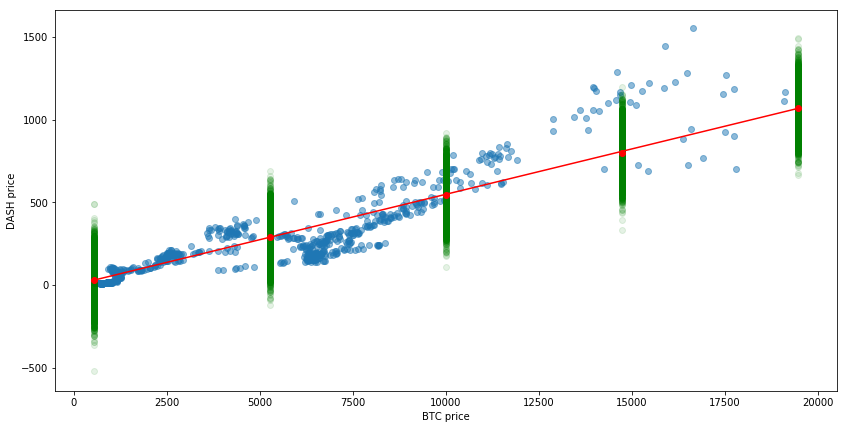

In [19]:
f, ax = plt.subplots(1, 1, figsize=(14,7), sharex=True)
preds = samples['ypreds'].T
ax.scatter(data['BTC price(USD)'], data['DASH price(USD)'], alpha=0.5)
ax.set_ylabel('DASH price')
ax.set_xlabel('BTC price')
ax.plot([p[0],p[-1]], [np.mean(preds[0]),np.mean(preds[-1])], c='r', alpha=1)
for i in range(m):
    ax.scatter([p[i]]*len(preds[i]),preds[i], alpha=0.1, c='g', marker="o")
    ax.scatter(p[i],np.mean(preds[i]), c='r')


Lastly we'll do Pareto smoothed importance sampling, so that we can compare the models.

In [20]:
from psis import psisloo
loglik = samples['log_lik']
loo, loos, ks = psisloo(loglik)
print("Loo: %.2f" % loo)

ks_sum = [[
    (ks <= 0.5).sum(),
    sum([1 for k in ks if k > 0.5 and k <= 0.7]),
    (ks > 0.7).sum()
]]

ks_df = pd.DataFrame(ks_sum, columns=["k<=0.5", "0.5<k<=0.7", "0.7<k"])
print(ks_df)

Loo: -5273.84
   k<=0.5  0.5<k<=0.7  0.7<k
0     856           0      0


#### Student-t linear model in Stan

We'll complete the same steps as above but for the Student's t-distribution. This could prove to be favourable as the Student's t-distribution has heavier tails and could thus fit better for the high variation at high prices.  

The stan model is the following

In [21]:
with open('prediction/lin_t.stan') as file:
    print(file.read())

// Linear student-t model
data {
    int<lower=0> N; // number of data points
    int<lower=0> M;	// number of prediction points
    vector[N] x; //
    vector[N] y; //
    vector[M] xpreds; // input location for prediction
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
    real<lower=1, upper=80> nu;
}
transformed parameters {
    vector[N] mu;
    mu = alpha + beta*x;
}
model {
    nu ~ gamma(2, 0.1); // Juarez and Steel(2010)
    y ~ student_t(nu, mu, sigma);
}
generated quantities {
    vector[M] ypreds;
    vector[N] log_lik;
    for(i in 1:M) {
        ypreds[i] = normal_rng(alpha + beta*xpreds[i], sigma);
    }
    for (i in 1:N){
        log_lik[i] = student_t_lpdf(y[i] | nu, mu[i], sigma);
    }
}



#### Repeating the process for the other coins
Doing the same for the other big coins gives us the following predictions.
![title](prediction/predicting_big_coins_gauss.png)

The Student-t gives us the following result.
![title](prediction/predicting_big_coins_t.png)

#### Summary Pareto smoothed importance sampling values

##### Gaussian linear model
| Data      | Loo       | k<=0.5 | 0.5<k<=0.7 |
| :---------| ---------:|:------:|:----------:|
| BTC v DASH|   1041.15 |     856|      0     |
| BTC v LTC |   1038.67 |     856|      0     |
| BTC v ETH |    749.24 |     856|      0     |
| BTC v ETC |    681.05 |     856|      0     |

##### Students t linear model
| Data      | Loo       | k<=0.5 | 0.5<k<=0.7 |
| :---------| ---------:|:------:|:----------:|
| BTC v DASH|   1098.50 |     856|      0     |
| BTC v LTC |   1148.05 |     856|      0     |
| BTC v ETH |    747.74 |     856|      0     |
| BTC v ETC |    779.93 |     856|      0     |

## Discussion and Conclusions <a name="discussion"></a>



## References <a name="references"></a>
1. Coin Metrics, Data downloads. URL https://coinmetrics.io/data-downloads/ . (Online; accessed 27 November 2018)
2. CoinMarketCap, Historical Snapshot - November 25, 2018. URL https://coinmarketcap.com/historical/20181125/ . (Online; accessed 30 November 2018)
3. A Statistical Analysis of Cryptocurrencies. Stephen Chan, Jeffrey Chu, Saralees Nadarajah and Joerg Osterrieder, 31 May 2017. Journal of Risk and Financial Management.
4. Michael Betancourt. Bayesian Workflow. URL: https://betanalpha.github.io/writing/ (Online; accessed 20 November 2018) (Link given by Aki Vehtari on one of the lectures)
5. Stan distributions and helpful functions documentation. URL: https://mc-stan.org/docs/2_18/functions-reference/unbounded-continuous-distributions.html (Online; accessed 30 November 2018)

## Appendix <a name="appendix"></a>

### A.1. Stan codes for price variation (positive continuous distributions):

Data block for the different stan codes is the same, but parameters, model and thus generated quantities are somewhat different

In [ ]:
// Data Block same for all
data {
    int<lower=0> N; // number of data points
    int<lower=0> K; // number of groups/coins
    int<lower=1,upper=K> x[N]; // group/coin indicator
    vector[N] y;
    real low;
}

In [ ]:
// Chi-square
parameters {
    real<lower=low> mu0;
    real<lower=low> sigma0;
    vector<lower=low>[K] mu;
}
model {
  mu ~ lognormal(mu0, sigma0);
  y ~ chi_square(mu[x]);
}
generated quantities {
  // Log_likelihood for psis_loo values
  vector[N] log_lik;
  for (i in 1:N)
    log_lik[i] = chi_square_lpdf(y[i] | mu[x[i]]);
}


In [ ]:
// Inverse chi-square
parameters {
    real<lower=low> mu0;
    real<lower=low> sigma0;
    vector<lower=low>[K] mu;
}
model {
  mu ~ lognormal(mu0, sigma0);
  y ~ inv_chi_square(mu[x]);
}
generated quantities {
  // Log_likelihood for psis_loo values
  vector[N] log_lik;
  for (i in 1:N)
    log_lik[i] = inv_chi_square_lpdf(y[i] | mu[x[i]]);
}


In [ ]:
// Lognormal
parameters {
    real<lower=low> mu0;
    real<lower=low> sigma0;
    vector<lower=low>[K] mu;
    real<lower=low> sigma;
}
model {
  mu ~ lognormal(mu0, sigma0);
  y ~ lognormal(mu[x], sigma);
}
generated quantities {
  // Log_likelihood for psis_loo values
  vector[N] log_lik;
  for (i in 1:N)
    log_lik[i] = lognormal_lpdf(y[i] | mu[x[i]], sigma);
}


In [ ]:
// Weibull
parameters {
    real<lower=low> mu0;
    real<lower=low> sigma0;
    vector<lower=low>[K] sigma;
    real<lower=low> mu;
}
model {
  sigma ~ lognormal(mu0, sigma0);
  y ~ weibull(mu, sigma[x]);
}
generated quantities {
  // Log_likelihood for psis_loo values
  vector[N] log_lik;
  for (i in 1:N)
    log_lik[i] = weibull_lpdf(y[i] | mu, sigma[x[i]]);
}


### A.2. Price variation convergence results (positive continuous):

In [ ]:
norm:
               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             5.74    0.09   3.99   0.47   3.25    5.2   7.57  14.09   1863    1.0
sigma0          9.59    0.13    5.4   4.71   6.73   8.35  10.89  21.65   1634    1.0
mu[1]           0.05  3.7e-3   0.26  -0.46  -0.14   0.05   0.22   0.56   4875    1.0
mu[2]          18.81  4.0e-3   0.27  18.29  18.63  18.81  18.99  19.34   4478    1.0
mu[3]           3.62  3.7e-3   0.27    3.1   3.45   3.62    3.8   4.14   5228    1.0
mu[4]           2.24  4.2e-3   0.27    1.7   2.06   2.25   2.42   2.77   4322    1.0
mu[5]           4.72  4.1e-3   0.27   4.19   4.53   4.72    4.9   5.24   4380    1.0
mu[6]           0.04  4.1e-3   0.27   -0.5  -0.14   0.04   0.23   0.57   4485    1.0
sigma           6.09  1.2e-3   0.08   5.94   6.04   6.09   6.14   6.25   4560    1.0
log_lik[1-3072]								                           3500-5000 1.0
_____________________________________________________________________________________
chi-square:
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             1.03    0.02   0.72   0.07   0.55   0.93   1.36   2.75   2244    1.0
sigma0          1.84    0.02   0.89    0.9   1.28   1.61   2.12   4.06   2214    1.0
mu[1]           0.48  3.1e-4   0.02   0.44   0.46   0.48   0.49   0.52   4357    1.0
mu[2]           14.6  3.5e-3   0.23  14.14  14.44  14.59  14.75  15.07   4346    1.0
mu[3]            3.8  1.7e-3   0.11   3.59   3.72   3.79   3.87   4.01   3917    1.0
mu[4]            2.4  1.2e-3   0.08   2.25   2.34   2.39   2.45   2.55   4352    1.0
mu[5]           4.94  1.9e-3   0.12    4.7   4.86   4.94   5.03   5.19   4162    1.0
mu[6]           0.45  2.9e-4   0.02   0.41   0.44   0.45   0.46   0.49   4222    1.0
log_lik[1-3072]								                           3500-5000 1.0
_____________________________________________________________________________________
inv chi-square:
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             1.59    0.02   1.02   0.12   0.87   1.46   2.12   3.85   2580    1.0
sigma0          2.72    0.03   1.24   1.37   1.94    2.4   3.13   5.96   2057    1.0
mu[1]          43.09  5.6e-3   0.41  42.28  42.82  43.09  43.38   43.9   5250    1.0
mu[2]           0.63  4.4e-4   0.03   0.58   0.62   0.63   0.65   0.69   3589    1.0
mu[3]            1.1  7.1e-4   0.04   1.01   1.07    1.1   1.13   1.18   3725    1.0
mu[4]           1.49  7.9e-4   0.05   1.38   1.45   1.49   1.53    1.6   4838    1.0
mu[5]           0.96  5.6e-4   0.04   0.88   0.93   0.96   0.98   1.03   4619    1.0
mu[6]           57.0  6.4e-3   0.46   56.1  56.67   57.0  57.31  57.88   5142    1.0
log_lik[1-3072]								                           3500-5000 1.0
_____________________________________________________________________________________
weibull:
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             1.22    0.02   1.26   0.04   0.43   0.91   1.63   4.17   3041    1.0
sigma0          3.76    0.04   1.92   1.84   2.64   3.29   4.31   8.67   1970    1.0
sigma[1]        0.03  1.6e-5 9.9e-4   0.03   0.03   0.03   0.03   0.03   4052    1.0
sigma[2]       20.34    0.01   0.71   19.0  19.85  20.33  20.81  21.76   4183    1.0
sigma[3]         3.9  2.1e-3   0.13   3.66   3.82    3.9   3.99   4.17   3747    1.0
sigma[4]        2.49  1.4e-3   0.09   2.32   2.43   2.49   2.55   2.68   4256    1.0
sigma[5]        4.97  2.8e-3   0.18   4.64   4.85   4.97   5.08   5.32   3957    1.0
sigma[6]        0.04  2.3e-5 1.4e-3   0.04   0.04   0.04   0.04   0.04   3755    1.0
mu               1.3  3.0e-4   0.02   1.27   1.29    1.3   1.32   1.34   3498    1.0
log_lik[1-3072]								                           3500-5000 1.0
_____________________________________________________________________________________
lognormal:
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             3.57    0.23   5.62   0.09    0.8   1.79   4.03  18.72    620    1.0
sigma0         15.42    0.83  15.72   4.06   7.13  10.49  17.65   57.7    356   1.01
mu[1]         4.8e-4  2.5e-5 1.2e-39.5e-25 6.0e-8 2.3e-5 3.9e-4 3.9e-3   2231    1.0
mu[2]           2.61  3.3e-3   0.11    2.4   2.54   2.61   2.69   2.82   1023    1.0
mu[3]           1.04  3.1e-3   0.11   0.83   0.96   1.04   1.11   1.26   1244    1.0
mu[4]           0.38  3.4e-3   0.11   0.16    0.3   0.38   0.45    0.6   1032    1.0
mu[5]           1.38  2.9e-3    0.1   1.19   1.31   1.38   1.45   1.57   1238    1.0
mu[6]         4.7e-4  2.1e-5 1.1e-32.5e-23 2.7e-8 1.6e-5 3.2e-4 3.9e-3   2884    1.0
sigma           2.39  9.3e-4   0.03   2.33   2.37   2.39   2.41   2.45   1045    1.0
log_lik[1-3072]								                           3500-5000 1.0

Psis-Loo and k values:
norm.stan
psis-loo: -9917.198119593282 
K-VALUES:
 (-inf;0.5] & 3070 & 99.93489583333333
 (0.5;0.7] & 2 & 0.06510416666666667
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
______________________________________________
chi.stan
psis-loo: -4366.419948382528
K-VALUES:
 (-inf;0.5] & 3072 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
______________________________________________
inv_chi.stan
psis-loo: -15251.781472074534
K-VALUES:
 (-inf;0.5] & 3072 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
______________________________________________
weibull.stan
psis-loo: -2715.379821859008
K-VALUES:
 (-inf;0.5] & 3072 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
______________________________________________
lognormal.stan
psis-loo: -5849.437259681001
K-VALUES:
 (-inf;0.5] & 3072 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
______________________________________________
Effective parameters: 
norm:
 p_eff:9815.832776137628
chi-square:
 p_eff:4318.562791844692
inv-chi:
 p_eff:14965.007978940113
weibull:
 p_eff:2701.164757074006
lognormal:
 p_eff:5809.290561622702

### B.1. Price variation convergence results (unbounded continuous):

#### SMALL coins

In [ ]:
small_cheap_norm
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0            6.4e9   5.6e9 5.5e10-1.5e10 -1.4e8  6.2e4  1.5e8 1.3e11     96   1.03
sigma0        7.3e11  5.7e11 3.3e13  2.8e5  3.0e7  3.5e8  4.5e9 5.2e11   3326    1.0
mu[1]          -3.74  9.9e-4   0.04  -3.82  -3.77  -3.74  -3.71  -3.66   1673    1.0
mu[2]          -4.03  8.2e-4   0.04   -4.1  -4.05  -4.03   -4.0  -3.95   2257    1.0
sigma           0.91  4.1e-4   0.02   0.88    0.9   0.91   0.93   0.96   2382    1.0
ypred[1]       -3.73    0.01   0.92  -5.54  -4.36  -3.73  -3.12  -1.95   7863    1.0
ypred[2]       -4.02    0.01    0.9  -5.75  -4.64  -4.03  -3.41  -2.23   7743    1.0
log_lik[1]      -0.9  5.4e-4   0.03  -0.95  -0.91   -0.9  -0.88  -0.85   2259    1.0
log_lik[2]     -2.26  1.6e-3   0.08  -2.43  -2.31  -2.26  -2.21   -2.1   2759    1.0
log_lik[3]     -0.88  5.2e-4   0.02  -0.93  -0.89  -0.88  -0.86  -0.83   2287    1.0
...
log_lik[1022]  -1.53  1.0e-3   0.05  -1.63  -1.56  -1.53  -1.49  -1.43   2442    1.0
log_lik[1023]  -0.99  6.6e-4   0.03  -1.05  -1.01  -0.99  -0.97  -0.93   2027    1.0
log_lik[1024]  -1.19  8.0e-4   0.04  -1.27  -1.22  -1.19  -1.17  -1.12   2147    1.0
lp__          -440.7    1.12   3.81 -448.2 -443.3 -440.7 -438.1 -433.3     11   1.22

small_cheap_laplace
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0           -4.3e7   6.9e7  6.6e8 -1.2e9 -3.5e6  -1034  6.1e6  9.9e8     91   1.02
sigma0         1.5e9   4.1e8 1.3e10 3422.0  2.3e5  1.0e7  2.8e8  9.6e9    998   1.01
mu[1]          -3.72  4.8e-4   0.03  -3.78  -3.74  -3.72  -3.71  -3.67   3037    1.0
mu[2]          -4.19  6.1e-4   0.04  -4.25  -4.21  -4.19  -4.16   -4.1   3949    1.0
sigma           0.71  3.9e-4   0.02   0.67    0.7   0.71   0.73   0.76   3161    1.0
ypred[1]       -3.74    0.01   1.03  -6.01  -4.24  -3.72  -3.21  -1.62   7758    1.0
ypred[2]       -4.19    0.01   1.01  -6.31  -4.68  -4.19  -3.69  -2.06   7987    1.0
log_lik[1]     -0.85  7.4e-4   0.04  -0.92  -0.88  -0.85  -0.82  -0.76   2923    1.0
log_lik[2]      -2.3 10.0e-4   0.06  -2.43  -2.34   -2.3  -2.26  -2.19   3734    1.0
log_lik[3]     -0.78  7.6e-4   0.04  -0.85  -0.81  -0.78  -0.75  -0.69   2908    1.0
...
log_lik[1022]  -1.65  8.6e-4   0.05  -1.76  -1.68  -1.64  -1.61  -1.55   3939    1.0
log_lik[1023]   -1.1  7.0e-4   0.04  -1.17  -1.13   -1.1  -1.08  -1.02   2951    1.0
log_lik[1024]  -1.22  8.5e-4   0.05  -1.34  -1.26  -1.22  -1.18  -1.13   3954    1.0
lp__          -694.2    2.03   4.51 -701.9 -697.9 -694.5 -690.7 -685.8      5   1.41

small_cheap_logistic
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0           -3.8e7   7.9e7  2.9e8 -1.1e9 -6.0e5 385.89  2.1e6  5.2e8     14   1.49
sigma0         7.4e8   5.5e8  8.6e9 568.89  9.4e4  3.1e6  5.8e7  4.3e9    250   1.02
mu[1]          -3.74  1.6e-3   0.04  -3.82  -3.77  -3.74  -3.72  -3.67    552   1.02
mu[2]          -4.05  6.1e-3   0.05  -4.13  -4.09  -4.05  -4.02  -3.96     59   1.07
sigma           0.52  2.8e-4   0.01    0.5   0.51   0.52   0.53   0.55   2144   1.01
ypred[1]       -3.73    0.01   0.94  -5.62  -4.31  -3.74  -3.15   -1.8   8314    1.0
ypred[2]       -4.06    0.01   0.95  -5.99  -4.62  -4.06  -3.49  -2.16   7387    1.0
log_lik[1]     -0.83  1.4e-3   0.03  -0.89  -0.85  -0.84  -0.81  -0.78    411   1.02
log_lik[2]     -2.37    0.01   0.09  -2.56  -2.44  -2.38   -2.3  -2.22     62   1.07
log_lik[3]     -0.81  1.3e-3   0.03  -0.86  -0.82  -0.81  -0.79  -0.75    490   1.02
...
log_lik[1022]  -1.62  9.3e-3   0.07  -1.76  -1.67  -1.62  -1.57   -1.5     59   1.07
log_lik[1023]  -0.97  1.7e-3   0.03  -1.03  -0.99  -0.97  -0.94   -0.9    395   1.02
log_lik[1024]  -1.22  7.0e-3   0.06  -1.33  -1.25  -1.22  -1.17  -1.12     64   1.07
lp__           -1384    2.13   4.67  -1392  -1388  -1384  -1381  -1375      5   1.49

small_cheap_cauchy
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0           -2.5e9   1.8e9 1.3e10-4.4e10 -5.6e7  6.2e4  8.5e7  3.8e9     49   1.09
sigma0        5.7e10  3.5e10 2.2e12  2.5e5  1.5e7  1.8e8  1.5e9 1.3e11   3886    1.0
mu[1]          -3.73  6.7e-4   0.03  -3.79  -3.75  -3.73  -3.72  -3.68   1763    1.0
mu[2]          -4.14  1.0e-3   0.05  -4.23  -4.17  -4.14   -4.1  -4.04   2204    1.0
sigma           0.52  6.6e-4   0.02   0.48   0.51   0.52   0.54   0.56   1087    1.0
ypred[1]       -6.14     2.8 250.69  -9.44  -4.24  -3.73  -3.21   3.15   8009    1.0
ypred[2]       -3.44    0.55  49.13 -10.91  -4.67  -4.14  -3.62   2.23   7991    1.0
log_lik[1]     -0.85  1.1e-3   0.05  -0.95  -0.88  -0.85  -0.82  -0.75   2060    1.0
log_lik[2]     -2.65  1.3e-3   0.06  -2.77  -2.69  -2.65   -2.6  -2.52   2331    1.0
log_lik[3]     -0.76  1.1e-3   0.05  -0.86   -0.8  -0.76  -0.73  -0.67   2108    1.0
...
log_lik[1022]  -1.99  1.6e-3   0.08  -2.14  -2.04  -1.99  -1.94  -1.84   2393    1.0
log_lik[1023]  -1.18  1.3e-3   0.05  -1.29  -1.22  -1.18  -1.15  -1.07   1649    1.0
log_lik[1024]  -1.47  1.8e-3   0.09  -1.64  -1.52  -1.46  -1.41  -1.29   2332    1.0
lp__          -372.1    0.84   3.77 -379.3 -374.6 -372.3 -369.5 -364.9     20   1.14

small_expensive_norm
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             1.34    0.03   1.27  -1.17    0.9   1.36   1.82   3.56   1555    1.0
sigma0           1.9    0.05   1.91   0.59   0.96   1.35    2.1   6.66   1768    1.0
mu[1]           2.61  4.4e-4   0.04   2.54   2.59   2.61   2.63   2.68   6490    1.0
mu[2]           1.05  4.0e-4   0.03   0.98   1.03   1.05   1.07   1.12   7241    1.0
mu[3]            0.4  4.0e-4   0.03   0.34   0.38    0.4   0.43   0.47   7142    1.0
mu[4]           1.38  4.0e-4   0.03   1.32   1.36   1.38   1.41   1.45   7117    1.0
sigma           0.77  1.4e-4   0.01   0.75   0.76   0.77   0.78   0.79   7278    1.0
ypred[1]        2.62  8.4e-3   0.76   1.11   2.12   2.62   3.12   4.12   8292    1.0
ypred[2]        1.05  8.4e-3   0.76  -0.45   0.55   1.05   1.57   2.52   8282    1.0
ypred[3]         0.4  8.6e-3   0.77  -1.17  -0.12   0.41   0.93   1.93   8065    1.0
ypred[4]        1.39  8.8e-3   0.77  -0.12   0.87    1.4   1.91   2.87   7690    1.0
log_lik[1]     -4.16  1.9e-3   0.15  -4.47  -4.26  -4.16  -4.05  -3.86   6415    1.0
log_lik[2]     -0.66  2.0e-4   0.02   -0.7  -0.67  -0.66  -0.65  -0.63   7095    1.0
log_lik[3]     -1.14  5.1e-4   0.04  -1.23  -1.17  -1.14  -1.11  -1.06   7122    1.0
...
log_lik[2046]  -2.11  9.4e-4   0.08  -2.27  -2.16  -2.11  -2.05  -1.95   7411    1.0
log_lik[2047]  -2.57  1.2e-3    0.1  -2.77  -2.64  -2.57  -2.51  -2.39   7035    1.0
log_lik[2048]  -1.97  9.0e-4   0.08  -2.12  -2.02  -1.97  -1.92  -1.82   7035    1.0
lp__          -487.4    0.04   2.16 -492.7 -488.6 -487.0 -485.8 -484.4   2553    1.0

small_expensive_laplace
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             1.08    0.31   3.35  -1.97   0.81   1.37   1.89   3.94    114   1.04
sigma0          2.76    0.48   5.88   0.73   1.15   1.62   2.49  11.09    148   1.03
mu[1]           2.86  4.5e-4   0.04   2.78   2.83   2.86   2.88   2.93   7294    1.0
mu[2]           1.13  3.6e-4   0.03   1.07   1.11   1.13   1.15   1.19   7057    1.0
mu[3]           0.17  5.9e-4   0.05   0.08   0.13   0.17    0.2   0.27   7327    1.0
mu[4]           1.41  3.7e-4   0.03   1.34   1.39   1.41   1.43   1.47   7206    1.0
sigma           0.63  1.6e-4   0.01    0.6   0.62   0.63   0.64   0.66   7728    1.0
ypred[1]        2.85  9.7e-3   0.88   0.97   2.41   2.86   3.29   4.71   8277    1.0
ypred[2]        1.13    0.01   0.89  -0.79   0.68   1.14   1.58   3.02   7930    1.0
ypred[3]        0.17  9.8e-3   0.87  -1.68  -0.25   0.16    0.6   2.03   7952    1.0
ypred[4]        1.42    0.01    0.9  -0.44    1.0   1.42   1.86    3.3   7985    1.0
log_lik[1]     -3.86  9.6e-4   0.08  -4.02  -3.91  -3.86   -3.8  -3.69   7514    1.0
log_lik[2]      -0.5  5.9e-4   0.05   -0.6  -0.53   -0.5  -0.47   -0.4   7277    1.0
log_lik[3]     -1.06  9.5e-4   0.08  -1.23  -1.11  -1.05   -1.0  -0.91   7312    1.0
...
log_lik[2046]  -2.44  6.5e-4   0.06  -2.55  -2.48  -2.44   -2.4  -2.33   7111    1.0
log_lik[2047]  -2.25  9.6e-4   0.08  -2.42   -2.3  -2.25  -2.19   -2.1   7548    1.0
log_lik[2048]  -2.25  6.3e-4   0.05  -2.35  -2.28  -2.25  -2.21  -2.14   7533    1.0
lp__           -1098    0.12   2.31  -1104  -1099  -1098  -1097  -1095    398   1.01

small_expensive_logistic
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             1.35    0.04   1.54  -1.62   0.85   1.36   1.86   4.05   1357    1.0
sigma0          2.16    0.07   2.63   0.63   1.02   1.47    2.3   7.82   1284    1.0
mu[1]           2.68  4.5e-4   0.04   2.61   2.65   2.68    2.7   2.75   6792    1.0
mu[2]           1.05  4.0e-4   0.03   0.98   1.03   1.05   1.07   1.12   7338    1.0
mu[3]           0.35  4.4e-4   0.04   0.27   0.32   0.35   0.37   0.42   7398    1.0
mu[4]           1.38  3.7e-4   0.03   1.31   1.35   1.38    1.4   1.44   7703    1.0
sigma           0.45  9.4e-5 8.2e-3   0.43   0.44   0.45   0.45   0.47   7654    1.0
ypred[1]        2.67  9.1e-3   0.83   0.97   2.18   2.67   3.16   4.36   8200    1.0
ypred[2]        1.03  9.1e-3   0.81  -0.63   0.55   1.04   1.52   2.65   8016    1.0
ypred[3]        0.35  9.3e-3   0.81  -1.27  -0.14   0.35   0.85   2.02   7570    1.0
ypred[4]        1.38  9.1e-3   0.81  -0.23   0.87   1.38   1.86   2.98   7839    1.0
log_lik[1]      -3.9  1.3e-3   0.11   -4.1  -3.97   -3.9  -3.83  -3.69   6726    1.0
log_lik[2]      -0.6  2.3e-4   0.02  -0.64  -0.61   -0.6  -0.58  -0.56   7468    1.0
log_lik[3]     -1.14  6.4e-4   0.06  -1.25  -1.18  -1.14   -1.1  -1.03   7398    1.0
...
log_lik[2046]  -2.22  8.7e-4   0.07  -2.37  -2.27  -2.22  -2.17  -2.08   7342    1.0
log_lik[2047]   -2.5  9.7e-4   0.09  -2.67  -2.56   -2.5  -2.44  -2.34   7713    1.0
log_lik[2048]  -2.08  7.7e-4   0.07  -2.21  -2.12  -2.08  -2.03  -1.94   7929    1.0
lp__           -2416    0.05   2.21  -2422  -2418  -2416  -2415  -2413   2144    1.0

small_expensive_cauchy
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             1.25    0.08   2.08  -2.29   0.73   1.35   1.94   4.28    747    1.0
sigma0          2.61    0.14   4.47   0.75   1.23   1.77   2.72   9.46   1005    1.0
mu[1]           2.89  4.0e-4   0.03   2.82   2.87   2.89   2.91   2.96   7083    1.0
mu[2]           1.11  3.9e-4   0.03   1.04   1.09   1.11   1.13   1.18   7501    1.0
mu[3]           0.05  4.9e-4   0.04  -0.03   0.02   0.05   0.08   0.14   7492    1.0
mu[4]           1.39  3.3e-4   0.03   1.33   1.37   1.39   1.41   1.45   7387    1.0
sigma           0.47  1.7e-4   0.01   0.44   0.46   0.47   0.48    0.5   6933    1.0
ypred[1]        2.35     0.6  53.98  -3.03   2.42   2.88   3.33   8.27   8007    1.0
ypred[2]        1.04     0.4  35.42  -4.99   0.65   1.11   1.58   7.21   8036    1.0
ypred[3]      -38.86   39.04 3493.9  -5.69  -0.42   0.05   0.54   6.09   8008    1.0
ypred[4]        1.72    0.51  45.17  -5.42   0.92   1.38   1.83   7.87   7985    1.0
log_lik[1]     -3.62  5.1e-4   0.04   -3.7  -3.65  -3.62  -3.59  -3.53   6670    1.0
log_lik[2]     -0.49  5.2e-4   0.05  -0.59  -0.52  -0.49  -0.46  -0.41   8048    1.0
log_lik[3]     -0.94  1.1e-3   0.09  -1.13   -1.0  -0.94  -0.88  -0.77   7386    1.0
...
log_lik[2046]  -2.64  6.4e-4   0.05  -2.74  -2.68  -2.64  -2.61  -2.54   6639    1.0
log_lik[2047]  -2.34  6.8e-4   0.06  -2.46  -2.38  -2.34   -2.3  -2.22   8355    1.0
log_lik[2048]  -2.48  5.5e-4   0.05  -2.57  -2.51  -2.48  -2.45  -2.39   7251    1.0
lp__          -445.8    0.05   2.23 -451.2 -446.9 -445.4 -444.2 -442.7   1967    1.0


In [ ]:
cheap norm
psis-loo: -1362.8579714727484
K-VALUES:

 (-inf;0.5] & 1024 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
 
 p_eff:1303.4201772321528

cheap laplace
psis-loo: -1388.7278311372618
K-VALUES:

 (-inf;0.5] & 1024 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
 
 p_eff:1328.9902476149828

cheap logistic
psis-loo: -1370.5909297089192
K-VALUES:

 (-inf;0.5] & 1024 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
 
 p_eff:1310.6457647104382

cheap cauchy
psis-loo: -1526.4111076212141
K-VALUES:

 (-inf;0.5] & 1024 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
 
 p_eff:1460.6464987647012

expensive norm
psis-loo: -2368.8622836308004
K-VALUES:

 (-inf;0.5] & 2048 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
 
 p_eff:2315.3510146880626

expensive laplace
psis-loo: -2518.462464130536
K-VALUES:

 (-inf;0.5] & 2048 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
 
 p_eff:2467.8075769856764

expensive logistic
psis-loo: -2415.802829512738
K-VALUES:

 (-inf;0.5] & 2048 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
 
 p_eff:2363.9752340041196

expensive cauchy
psis-loo: -2789.849802503597
K-VALUES:

 (-inf;0.5] & 2048 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
 
 p_eff:2739.4458497175733

#### BIG coins

In [ ]:
big_cheap_norm.stan
               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0         -1.6e13  1.5e13 5.1e13-1.2e14-5.8e13 5.4e11 3.6e12 9.9e13     12   1.45
sigma0          inf     nan    inf 1.6e20 4.6e832.9e1544.7e2292.9e300    nan    nan
mu[1]          -2.0  9.3e-4   0.05  -2.09  -2.03   -2.0  -1.97  -1.91   2481    1.0
sigma          0.96  6.8e-4   0.03   0.89   0.93   0.95   0.98   1.02   2467    1.0
ypred[1]      -2.02    0.01   0.95  -3.92  -2.65  -2.01  -1.37  -0.17   7343    1.0
log_lik[1]    -2.71  2.5e-3   0.13  -2.98  -2.79  -2.71  -2.62  -2.47   2647    1.0
log_lik[2]    -2.46  2.2e-3   0.11   -2.7  -2.54  -2.46  -2.39  -2.25   2656    1.0
log_lik[3]    -2.38  2.1e-3   0.11   -2.6  -2.45  -2.38   -2.3  -2.18   2660    1.0
...
log_lik[423]  -1.85  1.5e-3   0.07   -2.0  -1.89  -1.84  -1.79  -1.71   2633    1.0
log_lik[424]  -1.81  1.4e-3   0.07  -1.96  -1.86  -1.81  -1.76  -1.68   2633    1.0
log_lik[425]  -1.61  1.2e-3   0.06  -1.74  -1.65  -1.61  -1.57   -1.5   2617    1.0
lp__         -191.9    0.02   1.03 -194.6 -192.3 -191.6 -191.2 -190.9   1766    1.0

big_cheap_laplace.stan
               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0         -1.4e13  2.3e13 3.8e13-1.1e14-4.1e12 2.1e12 7.1e12 2.3e13      3   3.19
sigma0          inf     nan    inf 2.4e20 1.5e852.1e1592.4e2333.5e301    nan    nan
mu[1]         -1.94  8.7e-4   0.04  -2.03  -1.97  -1.94  -1.91  -1.86   2431    1.0
sigma          0.76  7.5e-4   0.04    0.7   0.74   0.76   0.79   0.84   2426    1.0
ypred[1]      -1.94    0.01   1.07  -4.22  -2.46  -1.93   -1.4   0.28   7497    1.0
log_lik[1]     -2.9  1.9e-3   0.09  -3.08  -2.96   -2.9  -2.84  -2.72   2355    1.0
log_lik[2]    -2.74  1.8e-3   0.09  -2.91  -2.79  -2.73  -2.68  -2.57   2351    1.0
log_lik[3]    -2.68  1.7e-3   0.08  -2.84  -2.73  -2.67  -2.62  -2.51   2349    1.0
...
log_lik[423]  -2.25  1.4e-3   0.07  -2.39  -2.29  -2.25   -2.2  -2.11   2345    1.0
log_lik[424]  -2.22  1.4e-3   0.07  -2.35  -2.26  -2.22  -2.17  -2.08   2346    1.0
log_lik[425]  -2.02  1.3e-3   0.06  -2.15  -2.07  -2.03  -1.98   -1.9   2355    1.0
lp__         -309.4    0.02   0.98 -312.1 -309.8 -309.1 -308.7 -308.5   2124    1.0

big_cheap_logistic.stan
               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0         -5.5e13  2.6e13 5.7e13-1.8e14-8.7e13-4.8e13-7.8e12 1.6e13      5   2.28
sigma0          inf     nan    inf 2.6e21 3.5e831.9e1561.9e2303.7e300    nan    nan
mu[1]         -1.98  9.1e-4   0.05  -2.07  -2.01  -1.98  -1.95  -1.89   2592    1.0
sigma          0.55  4.4e-4   0.02   0.51   0.54   0.55   0.57    0.6   2526    1.0
ypred[1]      -1.98    0.01   1.01  -4.02  -2.59  -1.99  -1.38   0.11   7297    1.0
log_lik[1]    -2.83  2.3e-3   0.12  -3.06   -2.9  -2.82  -2.75  -2.61   2570    1.0
log_lik[2]    -2.61  2.1e-3   0.11  -2.83  -2.68  -2.61  -2.54  -2.42   2578    1.0
log_lik[3]    -2.54  2.0e-3    0.1  -2.75  -2.61  -2.54  -2.47  -2.35   2581    1.0
...
log_lik[423]  -2.02  1.6e-3   0.08  -2.19  -2.07  -2.02  -1.96  -1.87   2602    1.0
log_lik[424]  -1.99  1.6e-3   0.08  -2.15  -2.04  -1.98  -1.93  -1.83   2604    1.0
log_lik[425]  -1.77  1.4e-3   0.07  -1.91  -1.82  -1.77  -1.72  -1.64   2611    1.0
lp__         -591.1    0.02   0.99 -593.7 -591.5 -590.8 -590.4 -590.1   2223    1.0

big_cheap_cauchy.stan
               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0         -3.0e12  1.6e13 5.9e13-1.6e14-1.8e13 1.2e12 1.1e13 1.0e14     14    1.4
sigma0          inf     nan    inf 7.7e21 7.7e881.8e1639.8e2364.5e301    nan    nan
mu[1]         -1.95 10.0e-4   0.05  -2.04  -1.98  -1.95  -1.92  -1.86   2092    1.0
sigma          0.58  6.9e-4   0.04   0.51   0.55   0.57    0.6   0.65   2729    1.0
ypred[1]      -1.79    0.34  29.87  -9.95  -2.56  -1.95  -1.36   6.41   7931    1.0
log_lik[1]    -3.05  1.4e-3   0.07  -3.19   -3.1  -3.05  -3.01  -2.92   2404    1.0
log_lik[2]    -2.93  1.4e-3   0.07  -3.06  -2.97  -2.93  -2.88  -2.79   2367    1.0
log_lik[3]    -2.88  1.4e-3   0.07  -3.02  -2.93  -2.88  -2.83  -2.74   2352    1.0
...
log_lik[423]  -2.51  1.5e-3   0.07  -2.65  -2.56  -2.51  -2.46  -2.37   2233    1.0
log_lik[424]  -2.48  1.5e-3   0.07  -2.62  -2.53  -2.48  -2.43  -2.34   2224    1.0
log_lik[425]  -2.29  1.6e-3   0.07  -2.43  -2.34  -2.29  -2.24  -2.15   2180    1.0
lp__         -176.8    0.03   1.08 -179.7 -177.2 -176.5 -176.0 -175.8   1662    1.0

big_expensive_norm
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             6.28     0.2   4.22   1.04   5.59   6.55   7.49  11.03    451   1.01
sigma0          4.17    0.37   8.47   1.18    1.9   2.69   4.17  14.81    520   1.01
mu[1]           6.73  2.8e-4   0.02   6.68   6.71   6.73   6.74   6.77   8144    1.0
mu[2]           8.97  2.8e-4   0.03   8.92   8.95   8.97   8.99   9.02   7870    1.0
mu[3]           6.07  3.0e-4   0.03   6.02   6.06   6.07   6.09   6.12   7328    1.0
mu[4]           4.58  3.0e-4   0.03   4.53   4.56   4.58   4.59   4.63   7524    1.0
sigma           0.52  9.9e-5 8.8e-3    0.5   0.51   0.52   0.53   0.54   7847    1.0
ypred[1]        6.73  5.8e-3   0.52    5.7   6.38   6.73   7.07   7.77   8051    1.0
ypred[2]        8.96  5.8e-3   0.52   7.95   8.62   8.96   9.31   9.98   7932    1.0
ypred[3]        6.08  5.7e-3   0.52   5.08   5.74   6.08   6.43   7.08   8130    1.0
ypred[4]        4.57  5.9e-3   0.52   3.56   4.22   4.57   4.93   5.58   7881    1.0
log_lik[1]     -1.06  6.7e-4   0.06  -1.18   -1.1  -1.05  -1.02  -0.94   8167    1.0
log_lik[2]     -0.92  6.2e-4   0.06  -1.03  -0.95  -0.91  -0.88  -0.81   7886    1.0
log_lik[3]     -0.51  4.1e-4   0.04  -0.59  -0.54  -0.51  -0.49  -0.45   7310    1.0
...
log_lik[1698]  -0.95  6.4e-4   0.06  -1.07  -0.99  -0.95  -0.91  -0.85   7888    1.0
log_lik[1699]  -3.21  1.7e-3   0.14   -3.5   -3.3  -3.21  -3.11  -2.93   7429    1.0
log_lik[1700]  -2.22  1.2e-3   0.11  -2.44  -2.29  -2.22  -2.14  -2.01   7619    1.0
lp__          254.22    0.06   2.22 248.95 253.06 254.64 255.81 257.27   1373   1.01

big_expensive_laplace
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             6.48    0.05   2.49   1.45   5.61   6.55   7.46  11.11   2323    1.0
sigma0          3.93     0.1   4.59   1.19   1.92    2.7   4.21  14.02   2161    1.0
mu[1]            6.7  4.1e-4   0.03   6.64   6.67    6.7   6.72   6.76   6267    1.0
mu[2]           8.89  2.7e-4   0.02   8.85   8.88   8.89   8.91   8.93   6163    1.0
mu[3]           6.12  2.8e-4   0.02   6.08   6.11   6.12   6.14   6.16   6355    1.0
mu[4]           4.47  4.4e-4   0.03   4.42   4.45   4.46   4.49   4.54   5216    1.0
sigma           0.42  1.2e-4   0.01    0.4   0.41   0.42   0.43   0.44   6763    1.0
ypred[1]         6.7  6.6e-3    0.6   5.42   6.41    6.7   6.99   7.99   8159    1.0
ypred[2]         8.9  6.9e-3   0.61   7.65   8.61   8.89   9.19  10.22   7739    1.0
ypred[3]        6.13  6.6e-3   0.58   4.88   5.84   6.12   6.42   7.38   7774    1.0
ypred[4]        4.47  6.6e-3   0.59   3.21   4.18   4.46   4.76   5.74   7911    1.0
log_lik[1]     -1.31  9.8e-4   0.08  -1.47  -1.37  -1.31  -1.26  -1.17   6243    1.0
log_lik[2]     -1.06  6.6e-4   0.05  -1.15  -1.09  -1.06  -1.02  -0.96   6056    1.0
log_lik[3]     -0.81  6.6e-4   0.05   -0.9  -0.85  -0.81  -0.77   -0.7   6387    1.0
...
log_lik[1698]   -1.1  6.6e-4   0.05  -1.19  -1.13   -1.1  -1.06   -1.0   6040    1.0
log_lik[1699]  -2.94  8.9e-4   0.07  -3.08  -2.99  -2.94  -2.89   -2.8   6707    1.0
log_lik[1700]  -2.01  1.1e-3   0.08  -2.19  -2.06  -2.01  -1.96  -1.88   5186    1.0
lp__          -235.0    0.04   2.18 -240.1 -236.1 -234.6 -233.3 -231.9   2511    1.0

big_expensive_logistic
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0              6.5    0.05   2.44   1.78   5.62   6.57   7.49  11.09   2415    1.0
sigma0          3.81    0.09   3.78   1.16   1.91    2.7   4.22   13.4   1779    1.0
mu[1]           6.72  3.0e-4   0.03   6.67    6.7   6.72   6.74   6.77   8376    1.0
mu[2]           8.95  2.8e-4   0.02   8.91   8.94   8.95   8.97    9.0   6907    1.0
mu[3]           6.08  2.9e-4   0.03   6.03   6.06   6.08    6.1   6.13   8292    1.0
mu[4]           4.55  3.0e-4   0.03    4.5   4.53   4.55   4.57    4.6   7972    1.0
sigma            0.3  6.6e-5 5.9e-3   0.29    0.3    0.3   0.31   0.31   8042    1.0
ypred[1]        6.71  6.0e-3   0.55   5.62   6.38   6.71   7.03   7.83   8239    1.0
ypred[2]        8.97  6.2e-3   0.55   7.85   8.63   8.96   9.31   10.1   8021    1.0
ypred[3]        6.07  6.3e-3   0.55   4.96   5.74   6.07    6.4   7.17   7573    1.0
ypred[4]        4.54  6.5e-3   0.55   3.44   4.21   4.55   4.88   5.65   7263    1.0
log_lik[1]     -1.17  8.1e-4   0.07  -1.32  -1.22  -1.17  -1.12  -1.03   8302    1.0
log_lik[2]     -0.99  6.7e-4   0.06  -1.11  -1.03  -0.99  -0.95  -0.89   7235    1.0
log_lik[3]     -0.55  5.3e-4   0.05  -0.64  -0.58  -0.55  -0.51  -0.45   8340    1.0
...
log_lik[1699]  -3.04  1.2e-3    0.1  -3.24  -3.11  -3.04  -2.97  -2.83   8145    1.0
log_lik[1700]  -2.18  1.0e-3   0.09  -2.36  -2.24  -2.19  -2.12  -2.01   8146    1.0
lp__           -1339    0.04   2.11  -1344  -1340  -1339  -1337  -1336   2495    1.0

big_expensive_cauchy
                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0             6.86    0.21   4.35   2.23   5.67   6.56   7.49  12.66    431   1.01
sigma0          4.11    0.25   6.09   1.17   1.92   2.73   4.25  15.38    570    1.0
mu[1]            6.7  3.7e-4   0.03   6.63   6.67    6.7   6.72   6.77   8484    1.0
mu[2]           8.91  1.9e-4   0.02   8.87    8.9   8.91   8.92   8.94   8082    1.0
mu[3]           6.11  3.1e-4   0.03   6.06   6.09   6.11   6.13   6.17   8720    1.0
mu[4]            4.4  4.2e-4   0.04   4.33   4.38    4.4   4.43   4.48   7751    1.0
sigma           0.32  1.1e-4   0.01    0.3   0.32   0.32   0.33   0.34   8073    1.0
ypred[1]        6.58    0.12  10.59   2.41   6.37   6.69   7.02  10.62   8158    1.0
ypred[2]        9.91    0.69  61.02   4.97   8.58   8.91   9.22  13.04   7907    1.0
ypred[3]        5.15     0.6  54.07   2.36   5.78   6.11   6.43  10.22   8008    1.0
ypred[4]        3.82    0.51  45.71  -0.06   4.07   4.41   4.73   8.55   7999    1.0
log_lik[1]     -1.57  9.6e-4   0.09  -1.75  -1.63  -1.58  -1.51   -1.4   8343    1.0
log_lik[2]     -1.33  5.2e-4   0.05  -1.42  -1.36  -1.33  -1.29  -1.23   8481    1.0
log_lik[3]     -0.96  9.4e-4   0.09  -1.12  -1.01  -0.96   -0.9  -0.78   8710    1.0
...
log_lik[1698]  -1.37  5.1e-4   0.05  -1.46   -1.4  -1.37  -1.34  -1.28   8504    1.0
log_lik[1699]  -2.86  5.7e-4   0.05  -2.96   -2.9  -2.87  -2.83  -2.76   8086    1.0
log_lik[1700]   -2.1  8.3e-4   0.08  -2.25  -2.15   -2.1  -2.05  -1.95   8388    1.0
lp__          294.32    0.06   2.22 288.92 293.14 294.73 295.95 297.34   1474    1.0



In [ ]:
cheap norm
psis-loo: -583.3168238995098
K-VALUES:

 (-inf;0.5] & 425 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0

 p_eff:510.8884098080273

cheap laplace
psis-loo: -604.7444389641925
K-VALUES:

 (-inf;0.5] & 425 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0

 p_eff:523.9722384139752

cheap logistic
psis-loo: -591.403197682519
K-VALUES:

 (-inf;0.5] & 425 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0
 
 p_eff:514.5332321355345

cheap cauchy
psis-loo: -663.9309474288935
K-VALUES:

 (-inf;0.5] & 425 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0

 p_eff:577.2725209288639

expensive norm
psis-loo: -1304.9356792232736
K-VALUES:

 (-inf;0.5] & 1700 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0

 p_eff:1276.5130961401203

expensive laplace
psis-loo: -1411.449696021804
K-VALUES:

 (-inf;0.5] & 1700 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0

 p_eff:1377.5703130535733

expensive logistic
psis-loo: -1336.11417418032
K-VALUES:

 (-inf;0.5] & 1700 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0

 p_eff:1305.5517347317807

expensive cauchy
psis-loo: -1650.8058242360069
K-VALUES:

 (-inf;0.5] & 1700 & 100.0
 (0.5;0.7] & 0 & 0.0
 (0.7;1.0] & 0 & 0.0
 (1.0;inf) & 0 & 0.0

 p_eff:1611.4775267600676


### B.2. Stan codes for price variation (unbounded continuous):

Data and parameters block is same for all four distributions. Normal can be seen fro A.1. The rest are below.

In [ ]:
data {
    int<lower=0> N; // number of data points
    int<lower=0> K; // number of groups
    int<lower=1,upper=K> x[N]; // group indicator
    vector[N] y; //
    real low;
}
parameters {
    real mu0;             // prior mean
    real<lower=low> sigma0; // prior std
    vector[K] mu;         // group means
    real<lower=low> sigma;  // common std
}

In [ ]:
// Cauchy
model {
  mu ~ normal(mu0, sigma0);
  y ~ cauchy(mu[x], sigma);
}
generated quantities {
  vector[K] ypred;
  vector[N] log_lik;
  // Posterior
  for (i in 1:K)
    ypred[i] = cauchy_rng(mu[i], sigma);
  // Log_likelihood for psis_loo values
  for (i in 1:N)
    log_lik[i] = cauchy_lpdf(y[i] | mu[x[i]], sigma);
}

In [ ]:
// Laplace
model {
  mu ~ normal(mu0, sigma0);
  y ~ double_exponential(mu[x], sigma);
}
generated quantities {
  vector[K] ypred;
  vector[N] log_lik;
  // Posterior
  for (i in 1:K)
    ypred[i] = double_exponential_rng(mu[i], sigma);
  // Log_likelihood for psis_loo values
  for (i in 1:N)
    log_lik[i] = double_exponential_lpdf(y[i] | mu[x[i]], sigma);
}


In [ ]:
// Logistic
model {
  mu ~ normal(mu0, sigma0);
  y ~ logistic(mu[x], sigma);
}
generated quantities {
  vector[K] ypred;
  vector[N] log_lik;
  // Posterior
  for (i in 1:K)
    ypred[i] = logistic_rng(mu[i], sigma);
  // Log_likelihood for psis_loo values
  for (i in 1:N)
    log_lik[i] = logistic_lpdf(y[i] | mu[x[i]], sigma);
}


#### PYTHON CODE Final version for Price Variation

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pystan
import pandas as pd
import glob
from psis import psisloo
import winsound

# Sound for code finishing
duration = 2000  # millisecond
freq = 440  # Hz

small_data_path = "../data/small/"
smallFiles = glob.glob(small_data_path + "*.csv")
big_data_path = "../data/big/"
bigFiles = glob.glob(big_data_path + "*.csv")
# Features:
# "date",
# "marketcap",
# "price",
# "txVol",
# "fees"
PSIS_COMPARISONS = {}


def psispeffk(log_lik, name):
    loo, loos, kw = psisloo(log_lik)
    print("\n")
    print("psis-loo:", loo)
    err_05 = 0
    err_07 = 0
    err_1 = 0
    err_inf = 0
    for i in range(0, len(kw)):
        if kw[i] <= 0.5:
            err_05 += 1
        elif kw[i] <= 0.7:
            err_07 += 1
        elif kw[i] <= 1.0:
            err_1 += 1
        else:
            err_inf += 1
    _sum = 0
    for i in range(0, 30):
        _sum += np.log(np.mean(np.exp(log_lik[:, i])))

    PSIS_COMPARISONS[name] = "psis-loo: " + str(
        loo) + "\nK-VALUES:\n" + "\n" + " " + "(-inf;0.5] &" + " " + str(
        err_05) + " " + "&" + " " + str(
        100 * err_05 / len(kw)) + "\n" + " " + "(0.5;0.7] &" + " " + str(
        err_07) + " " + "&" + " " + str(
        100 * err_07 / len(kw)) + "\n" + " " + "(0.7;1.0] &" + " " + str(
        err_1) + " " + "&" + " " + str(
        100 * err_1 / len(kw)) + "\n" + " " + "(1.0;inf) &" + " " + str(
        err_inf) + " " + "&" + " " + str(100 * err_inf / len(
        kw)) + "\n" + " " + "\n" + "\n" + " " + "p_eff:" + str(_sum - loo)
    return 0


def Bayesian_Procedure_hier(hier_data, id_name, _cheap_coins):
    # Distributions
    stan_names = [
        # "norm_mix.stan"
        "norm.stan",
        # Positive
        # "lognormal.stan"
        # "chi.stan",
        # "inv_chi.stan",
        # "weibull.stan"
        # Continuous
        "laplace.stan",
        "logistic.stan",
        "cauchy.stan"
    ]
    # g for graphs, k groups for bayes
    k_cheap = []
    g_cheap = {}
    k_exp = []
    g_exp = {}
    for coin in hier_data:
        # xrp is bugged
        if coin != "xrp":
            mc = hier_data[coin]["marketcap"].tolist()[-1] // 1000000
            data = hier_data[coin]["price"].tolist()
            print(coin, len(data))
            log_data = np.log(data)
            if coin in _cheap_coins:
                k_cheap.append(log_data)
                g_cheap[coin] = (log_data, mc)
            else:
                k_exp.append(log_data)
                g_exp[coin] = (log_data, mc)

    g_set = {
        "cheap": g_cheap,
        "expensive": g_exp
    }
    for g_sub_name in g_set:
        g = g_set[g_sub_name]
        for coin in g:
            # coin_tuple 0 - data, 1 - marketcap
            c_t = g[coin]
            plt.hist(c_t[0], bins=50,
                     rwidth=1, alpha=0.7, label=coin + " " + str(c_t[1]))
        plt.grid(False)
        plt.title(id_name + " " + g_sub_name + " coins")
        plt.xlabel("log price (USD)")
        plt.ylabel("count")
        plt.legend()
        plt.savefig(id_name + "_" + g_sub_name + "_prices.png")
        plt.clf()
    k_set = {
        "cheap": k_cheap
        "expensive": k_exp
    }
    for k_sub_name in k_set:
        k_groups = k_set[k_sub_name]
        N = len(k_groups[0])  # Observations
        K = len(k_groups)  # Groups/coins
        h_flat = np.transpose(k_groups).flatten()
        h_x = np.tile(np.arange(1, K + 1), N)
        for stan_name in stan_names:
            print(stan_name)
            with open("stan/cont/" + stan_name, 'r') as stan_file:
                stan_code = stan_file.read()
            hier_model = pystan.StanModel(model_code=stan_code)
            stan_data = dict(
                N=len(h_flat),
                K=K,
                x=h_x,
                y=h_flat,
                low=np.nextafter(0, 1)
            )
            # Stan results
            fit = hier_model.sampling(data=stan_data, iter=4000)
            with open("Fits.txt", "a") as text_file:
                print(id_name + "_" + k_sub_name + "_" + stan_name + "\n" +
                      str(fit), file=text_file)
            samples = fit.extract(permuted=True)
            posterior_data = samples["ypred"]
            post_g_set = {}
            i = 0
            # Complex for loop for plotting the posterior. Don't bother to read.
            # Need labels. Assuming they go in same order.
            no_error = False
            for g_sub_name in g_set:
                # if cheap==cheap
                if g_sub_name == k_sub_name:
                    # Get dictionary of cheap or exp coins
                    g = g_set[g_sub_name]
                    # Get coin name to put posterior samples into dictionary
                    for coin in g:
                        # g tuple 0 - data, 1 - marketcap, coin - name
                        if len(posterior_data.shape) == 1:
                            post_g_set[coin] = posterior_data
                        else:
                            post_g_set[coin] = posterior_data[:, i]
                        try:
                            plt.hist(post_g_set[coin], bins=50,
                                     rwidth=1, alpha=0.7,
                                     label=coin)
                            no_error = True
                        except:
                            print("NaN")
                        i += 1
            if no_error:
                plt.grid(False)
                plt.title("posterior " + id_name + " " + k_sub_name + " " +
                          stan_name.split(".")[0])
                plt.xlabel("log price (USD)")
                plt.ylabel("count")
                plt.legend()
                plt.savefig(
                    "post_" + id_name + "_" + k_sub_name + "_" +
                    stan_name.split(".")[
                        0] + ".png")
                plt.clf()
            psispeffk(samples["log_lik"], k_sub_name + stan_name)
    return 0


if __name__ == '__main__':
    coins = {}
    for file in smallFiles:
        name = file.split("\\")[1].split(".")[0]
        coins[name] = pd.read_csv(file, index_col=0)
    cheap_coins = ["dgb", "xvg"]
    Bayesian_Procedure_hier(coins, "small", cheap_coins)
    for name in PSIS_COMPARISONS:
        with open("psis_loo_vals.txt", "a") as text_file:
            print(
                "small\n" + name + "\n" + PSIS_COMPARISONS[name],
                file=text_file
            )
    PSIS_COMPARISONS={}
    coins = {}
    for file in bigFiles:
        name = file.split("\\")[1].split(".")[0]
        coins[name] = pd.read_csv(file, index_col=0)
    cheap_coins = ["ada"]
    Bayesian_Procedure_hier(coins, "big", cheap_coins)
    for name in PSIS_COMPARISONS:
        with open("psis_loo_vals.txt", "a") as text_file:
            print(
                "big\n" + name + "\n" + PSIS_COMPARISONS[name],
                file=text_file
            )
    winsound.Beep(freq, duration)
